#Social Network Ads

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the data

In [ ]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Initiating the variables


In [ ]:
 X = data.drop(['Purchased'], axis = 1)
 y = data['Purchased'].values.reshape(-1,1)

#Identifying missing values

In [ ]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#Heat map

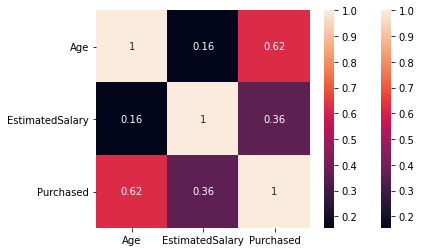

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.heatmap(correlation_matrix, )
plt.show()

#Splitting data into training, testing datase

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#Training our model using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Testing our model

In [ ]:
y_pred=classifier.predict(X_test)

#Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50  2]
 [ 9 19]]


0.8625

#Prediction for new values

In [ ]:
output= classifier.predict([[21,75000]])
output

array([1])

In [ ]:
output= classifier.predict(sc.transform([[19, 19000]]))
output

array([0])